In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Flatten, LSTM, GRU, Dense, SimpleRNN, GlobalMaxPool1D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
minst = tf.keras.datasets.mnist

In [4]:
(X_train,y_train),(X_test,y_test) = minst.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train, X_test = X_train/255.0, X_test/255.0

In [6]:
X_train.shape

(60000, 28, 28)

In [30]:
i = Input(shape = X_train[0].shape)
x = LSTM(128, return_sequences=True)(i)

x = GlobalMaxPool1D()(x)
x = Dense(10, activation= 'softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


with tf.device('/device:GPU:0'):
  r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3726 - accuracy: 0.8869 - val_loss: 0.1243 - val_accuracy: 0.9652
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1072 - accuracy: 0.9689 - val_loss: 0.0944 - val_accuracy: 0.9723
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0728 - accuracy: 0.9790 - val_loss: 0.0630 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0555 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0475 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0478 - val_accuracy

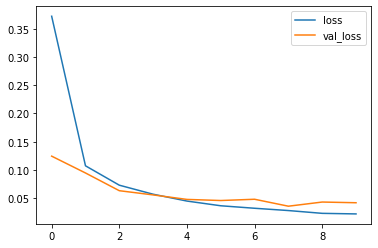

In [31]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

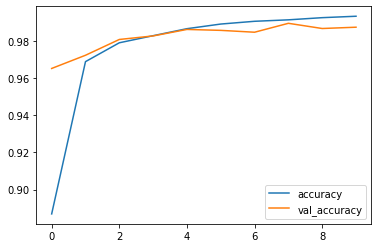

In [32]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [33]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test).argmax(axis=1)
cf = confusion_matrix(y_test,y_pred)
cf

array([[ 976,    0,    0,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1129,    1,    0,    0,    0,    2,    3,    0,    0],
       [   3,    5, 1006,    4,    3,    0,    1,   10,    0,    0],
       [   0,    0,    2, 1002,    0,    2,    0,    3,    1,    0],
       [   0,    0,    0,    0,  971,    0,    5,    1,    0,    5],
       [   1,    1,    0,    5,    0,  878,    1,    2,    4,    0],
       [   0,    3,    0,    0,    2,    5,  947,    0,    1,    0],
       [   0,    2,    4,    3,    1,    0,    0, 1016,    0,    2],
       [   0,    0,    1,    1,    0,    3,    0,    4,  965,    0],
       [   1,    0,    0,    3,    3,    7,    1,    6,    4,  984]])

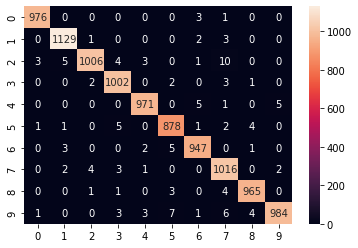

In [34]:
import seaborn as sns

sns.heatmap(cf,annot=True,fmt="g")

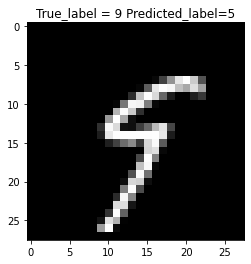

In [24]:
miss_idx = np.where(y_pred != y_test)[0]

i = np.random.choice(miss_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True_label = %s Predicted_label=%s' %(y_test[i],y_pred[i]));

In [36]:
len(y_pred == y_test)

10000